## Data Collection and Processing


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('household_power_consumption.txt', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data.fillna(data.mean(), inplace=True)
data.set_index('datetime', inplace=True)
daily_data = data.resample('D').mean()


C:\Users\manda\AppData\Local\Temp\ipykernel_30148\2597663340.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


## Exploratory Data Analysis

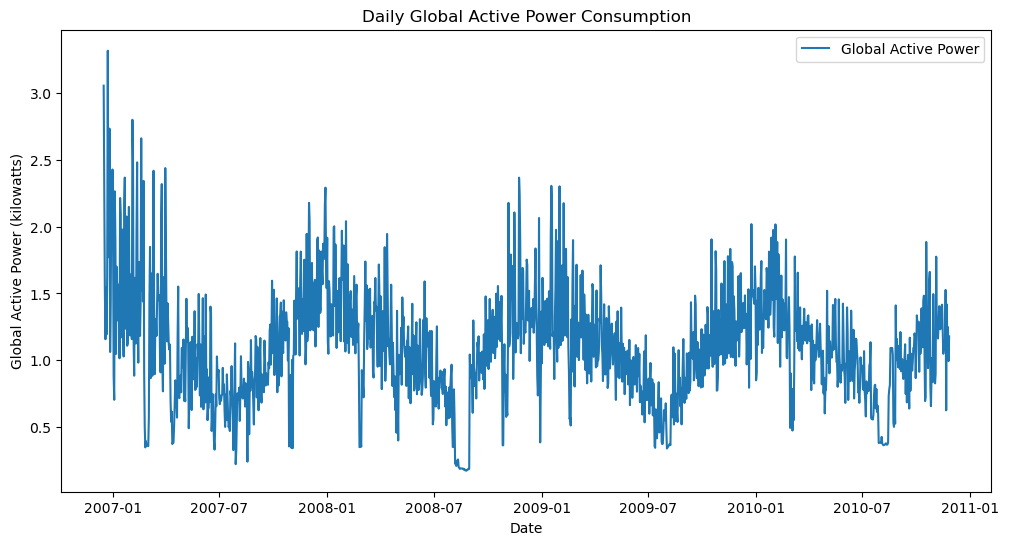

In [2]:
import matplotlib.pyplot as plt

# Plot the daily energy consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Global_active_power'], label='Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Daily Global Active Power Consumption')
plt.legend()
plt.show()

## Feature Engineering

Feature engineering is a crucial step in the machine learning pipeline. It involves creating new features or transforming existing ones to improve the performance of machine learning models. 

In [3]:
daily_data['lag_1'] = daily_data['Global_active_power'].shift(1)
daily_data['lag_2'] = daily_data['Global_active_power'].shift(2)
daily_data['lag_3'] = daily_data['Global_active_power'].shift(3)
daily_data['rolling_mean_3'] = daily_data['Global_active_power'].rolling(window=3).mean()
daily_data['rolling_mean_7'] = daily_data['Global_active_power'].rolling(window=7).mean()
daily_data.dropna(inplace=True)


## Train Test and Split


Train-test split is a method used to evaluate how well a model will perform on new, unseen data. It involves splitting your dataset into two parts: one for training the model and one for testing it. 

In [4]:
from sklearn.model_selection import train_test_split
X = daily_data.drop('Global_active_power', axis=1)
y = daily_data['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Model Training

Model training is the process of teaching a machine learning model to recognize patterns in data.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0002


## Model Evaluation

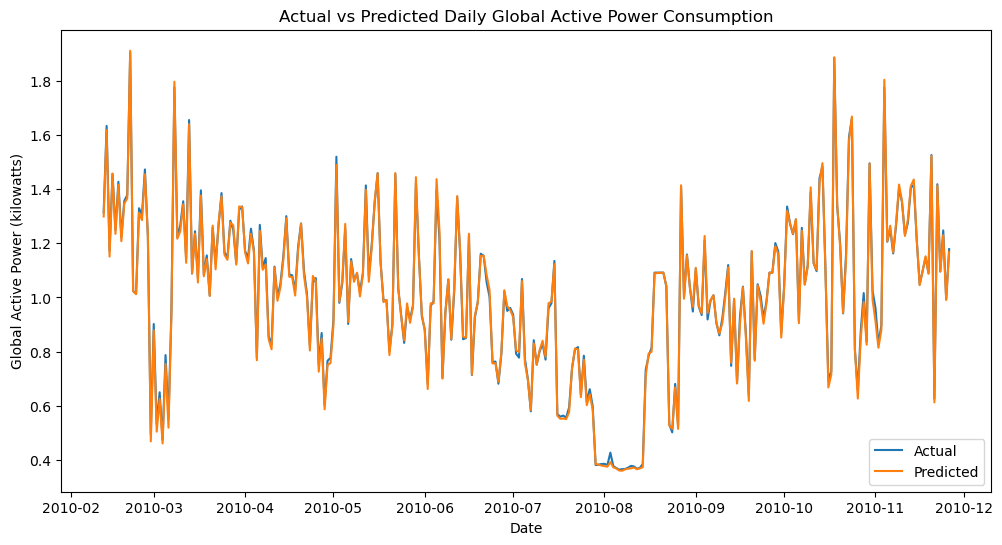

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Actual vs Predicted Daily Global Active Power Consumption')
plt.legend()
plt.show()

## Hyperparameter Tuning

Hyperparameter tuning in machine learning is like adjusting the settings on a machine to get the best performance. It's about finding the best values for the parameters that control the learning process of your model.

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {-grid_search.best_score_:.4f}')

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.0020
